<a href="https://colab.research.google.com/github/minhphan03/AMATH-301-Python-Notebooks/blob/main/finite_differences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Week 7 Lecture 1: Finite Differences

This week we will begin discussing the concept of numerical differentiation.  That is, we will be trying to numerically approximate the derivative(s) of a given function.  we will look at this concept from two slightly different angles.  One possibility is that we are given some function $f(x)$ and a point $x_0$ and we want to compute the derivative of $f$ at $x_0$.  That is, we want to find $f'(x_0)$.  If $f$ is relatively simple, then we already know how to do this from calculus, so we will generally assume that $f$ is either very complicated or that we do not have access to the formula.  (For instance, we might be given a MATLAB function but not be able to read the code.)  The other possibility is that we are given a set of data points $(x_0, y_0)$, $(x_1, y_1)$, $\dotsc$, $(x_N, y_N)$ and we want to find out how fast the data points are changing at one of the points $(x_k, y_k)$.  

These two situations are not as different as they might sound, and it is easy to convert back and forth between them.  If you are given a function $f(x)$, then you can simply plug in the numbers $x_0$, $x_1$, $\dotsc$, $x_N$ to obtain all the necessary $y$-values and then forget about the function.  Likewise, if you have a set of data, you can simply pretend that all of the $y$-values arose from some function $f(x)$, even if you don't know the formula.  

Both approaches are useful, but for different reasons.  From a theoretical point of view, it really only makes sense to talk about the derivative of a function.  There is no good rigorous definition of a derivative on a discrete set of points.  We will therefore always assume that we have a function $f(x)$ when working by hand.  However, in real world applications we almost never have access to the true formula that produced our data.  Instead, we have a set of data points and it is either expensive or impossible to collect any more.  When writing code, we will therefore almost always assume that we have a fixed set of $x$ and $y$ values, even if we really do know the function involved.  

## Forward difference scheme
Remember from your calculus class that the definition of a derivative is 

$f'(x) = \displaystyle\lim_{\Delta x\to 0}\frac{f(x + \Delta x) - f(x)}{\Delta x}. \hspace{1in}$ (1)

This presents a problem for us because computing a limit requires infinitely many points.  To find $f'(x)$ exactly, it is not enough to know $f(x + 0.1)$ or $f(x + 0.01)$ or $f(x + 0.001)$; we need to know $y$ values infinitely close to $f(x)$.  Of course, finding infinitely many points or points that are infinitely close together is not possible on a computer, so we will have to settle for some sort of approximation.  

Equation (1) suggests a simple method of approximating the derivative.  If $f'(x)$ is the limit of that difference quotient as $\Delta x$ becomes arbitrarilly small, perhaps we can choose a small but fixed value for $\Delta x$ and get a good approximation.  That is, if we fix some small number $\Delta x$ then we should have 

$f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}. \hspace{1in}$ (2)

It should be obvious from the definition of a limit that this is a valid approach.  If we choose too large a $\Delta x$ then we may get a bad approximation, but as we shrink $\Delta x$ we will necessarily get closer and closer to the true value of $f'(x)$.  Approximations of this form are called *difference schemes*, and this particular one is a *forward difference scheme*.  The word "forward" refers to the fact that we are evaluating $f$ at the point $x$ that we care about and another point $x + \Delta x$ ahead of that point.  If you were standing on the number line at $x$, then you would have to look forward to see $x + \Delta x$.  

A very important question to ask about any difference scheme is: "How quickly do we converge to the true value $f'(x)$ as we shrink $\Delta x$?"  That is, if we choose some small $\Delta x$ then there will be some error between our approximation and the real $f'(x)$.  If we choose a $\Delta x$ that is ten times smaller, what will happen to our error?  Will it also be ten times smaller?  One hundred times smaller?  Something else?  We can analyze the error of all difference schemes in a systematic way using Taylor expansions.  Remember that 

$f(x + \Delta x) = f(x) + \Delta x f'(x) + \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{3!}f'''(x) + ... + \frac{(\Delta x)^n}{n!}f^{(n)}(x) + ...$

For this equation to be an equality, we need infinitely many terms.  Of course, the whole point of using a difference scheme was so that we could avoid doing something infinitely many times.  Fortunately, when $\Delta x$ is small, $(\Delta x)^2$ or $(\Delta x)^3$ or $(\Delta x)^n$ will be *much* smaller.  This means that, as long as $\Delta x$ is small enough, we can safely ignore the terms with higher powers because they are very close to zero.  We will use the notation $\mathcal{O}(\Delta x^n)$ to indicate which terms we are ignoring.  We have already encountered this notation before, when counting the number of instructions required to solve a linear system.  The idea here is the same: $\mathcal{O}(\Delta x^n)$ represents a polynomial in $\Delta x$ where the largest term has a power of $n$.  Notice that in the section on linear systems, the largest term was the one with the largest exponent because we were dealing with a variable $N$ that was very large.  In this case, the largest term is the one with the smallest exponent because $\Delta x$ is very small.  This means that $\mathcal{O}(\Delta x^n)$ represents a polynomial where the smallest power of $\Delta x$ is $n$.  We can therefore rewrite our Taylor expansion as

$f(x + \Delta x) = f(x) + \Delta xf'(x) + \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)$.  

If we substitute this into the formula from (2), we get 

$f'(x) \approx \frac{1}{\Delta x}\left[f(x + \Delta x) - f(x)\right]$

$\approx \frac{1}{\Delta x}\left[f(x) + \Delta xf'(x) + \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4) - f(x)\right]$

$= \frac{1}{\Delta x}\left[\Delta xf'(x) + \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)\right]$

$= f'(x) + \frac{\Delta x}{2}f''(x) + \frac{(\Delta x)^2}{6}f'''(x) + \mathcal{O}(\Delta x^3)$.  

Notice that when $\Delta x$ goes all the way to zero, everything but the first term goes away and we are just left with $f'(x)$.  This is what we were trying to approximate in the first place, which is a good sign.  We say that the difference scheme is *consistent*, because in the limit as $\Delta x$ approaches zero it gives the correct value.  

Also note that when $\Delta x$ is very small, raising it to a power makes it even smaller.  In particular, $\Delta x^2$ and $\Delta x^3$ are much, much closer to zero than $\Delta x$.  This means that once $\Delta x$ is sufficiently small, we don't really need to worry about any of the higher powers of $\Delta x$.  We can therefore write (for sufficiently small $\Delta x$): 

$\frac{f(x + \Delta x) - f(x)}{\Delta x} \approx f'(x) + \frac{\Delta x}{2}f''(x)$.  

We call the second term in this equation the *leading error term*.  It tells us approximately how far off our approximation is from the true value of $f'(x)$.  Of course, we don't actually know $f''(x)$, so we don't know exactly what the error is.  However, we do know that the error is proportional to $\Delta x$ raised to the first power.  This means that if we shrink $\Delta x$ by a factor of ten, then the error will also shrink by a factor of ten.  Likewise, if we shrink $\Delta x$ by a factor of one hundred, then the error will also shrink by a factor of 100.  Because of this, we say that our difference scheme is first order.  We call equation (2) a *first order forward difference scheme* for $f'(x)$.  It is important to remember that the phrase "first order" in this name refers to the power of $\Delta x$ in the error, not to the fact that we are approximating a first derivative.  

## Backward difference scheme
In general, we like to keep $\Delta x$ positive in these equations, but the definition of a limit makes no such assumptions.  It therefore makes sense to consider negative $\Delta x$'s as well.  Instead of allowing $\Delta x$ to change sign, we will make a small modification to our difference scheme and just replace every $\Delta x$ in equation (2) with $-\Delta x$.  We obtain 

$f'(x) \approx \frac{f(x) - f(x - \Delta x)}{\Delta x}. \hspace{1in}$ (3)

This is called a *backward difference scheme* because it involves the point $x$ and a point behind $x$.  (Again, if you imagine standing on the number line at $x$ then you would have to look backwards to see the point $x - \Delta x$.)  We can analyze the error properties of this scheme just like we did with the forward difference scheme.  To do so, we need to adjust our Taylor expansion by replacing every $\Delta x$ with a $-\Delta x$.  We get 

$f(x - \Delta x) = f(x) - \Delta x f'(x) + \frac{(\Delta x)^2}{2}f''(x) - \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)$.  

(Notice that the notation $\mathcal{O}(\Delta x^4)$ is already ignoring any constants in front of the $\Delta x^4$ term, so it does not matter if we say $+\mathcal{O}(\Delta x^4)$ or $-\mathcal{O}(\Delta x^4)$.  By convention, we always use a + sign.)

If we substitute this into formula (3), we obtain 

$f'(x) \approx \frac{1}{\Delta x}\left[f(x) - \left(f(x) - \Delta xf'(x) + \frac{(\Delta x)^2}{2}f''(x) - \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)\right)\right]$

$= \frac{1}{\Delta x}\left[\Delta xf'(x) - \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)\right]$

$= f'(x) - \frac{\Delta x}{2}f''(x) + \frac{(\Delta x)^2}{6} + \mathcal{O}(\Delta x^4)$.  

Once again, if $\Delta x$ goes all the way to zero then every term disappears except for the $f'(x)$, so this difference scheme is also consistent.  If $\Delta x$ is very small, but not actually zero, then all the terms after the first two are so small that they don't really matter, so we can say that 

$\frac{f(x) - f(x - \Delta x)}{\Delta x} \approx f'(x) - \frac{\Delta x}{2}f''(x)$.  

The leading error term is therefore $-\frac{\Delta x}{2}f''(x)$, which has a $\Delta x^1$.  We therefore know that our difference scheme is first order, and so we call it a *first order backward difference scheme*.  

## Central difference scheme
The leading error terms for these forward and backward difference schemes have an interesting relationship.  They are the same except for their sign.  This means that if $f''(x)$ is positive then the forward difference scheme will overestimate $f'(x)$ by some amount and the backward difference scheme will underestimate by almost exactly the same amount.  (The "almost" is important - we threw away higher order terms in those approximations because they were much smaller than the leading term, but those terms aren't exactly zero and they probably don't cancel.)  This suggests a better difference scheme: What if we calculate the forward and backward difference approximations and then average them together?  This gives us the following scheme: 

$f'(x) \approx \frac{1}{2}\left(\frac{f(x + \Delta x) - f(x)}{\Delta x} + \frac{f(x) - f(x - \Delta x)}{\Delta x}\right) = \frac{f(x + \Delta x) - f(x - \Delta x)}{2\Delta x}.\hspace{1in}$ (4)

This is called a *central difference scheme* because $x$ is in between the other points that we use.  From the above argument, we have reason to hope that this scheme has better error properties than either of the original schemes alone.  We can check this using Taylor expansions, just as we did before.  We get 

$f'(x) \approx \frac{f(x + \Delta x) - f(x - \Delta x)}{2\Delta x}$

$= \frac{1}{2\Delta x}\left[f(x) + \Delta xf'(x) + \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4) - \left(f(x) - \Delta xf'(x) + \frac{(\Delta x)^2}{2}f''(x) - \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)\right)\right]$

$= \frac{1}{2\Delta x}\left[2\Delta xf'(x) + \frac{(\Delta x)^3}{3}f'''(x) + \mathcal{O}(\Delta x^4)\right]$

$= f'(x) + \frac{(\Delta x)^2}{6}f'''(x) + \mathcal{O}(\Delta x^3)$.  

Notice that when $\Delta x$ goes all the way to zero, we are just left with $f'(x)$.  This means that our new scheme is still consistent.  The leading error term, however, is quite different in this scheme.  In particular, it has a $\Delta x^2$ in it, so the error is second order or $\mathcal{O}(\Delta x^2)$.  This means that if we shrink $\Delta x$ by a factor of 10, the error of the forward and backward difference schemes from above only shrinks by a factor of 10, but the error for the central difference scheme shrinks by a factor of $10^2 = 100$.  We call this scheme a *second order central difference scheme*.  

## Why use higher order schemes?
We are usually not just interested in finding $f'(x)$ at one point.  Instead, we have a collection of many data points and we want to find $f'$ at all of them so that we will have a good approximation to the function $f'(x)$.  In order to get a good approximation to $f'$, we need the error at each of these points to be small, which means we need to know $y$ values at points very close to all of our original data points.  In practice, this means that if you want to make $\Delta x$ smaller, then you have to collect data at many more points.  In particular, if you want to make $\Delta x$ ten times smaller, then you will typically need to collect ten times as much data.  Data collection is often the most expensive part of an experiment, so it is important to use methods that don't require any more data than necessary.  This is why we place such an emphasis on the order of the error term.  It is not uncommon to encounter a situation like this; You plan to do an experiment that will require (at some point in the analysis) the approximation of a derivative.  You collect some data for the pilot study and find that the error in this approximation is so large that you can't use the results.  For the full study to be useful, you will need 100 times less error in your approximation.  If you use a first order difference scheme, then you will need 100 times more data for the full study, which probably means that the full study will be around 100 times more expensive than the pilot.  If you instead used a second order difference scheme, you would only need 10 times more data, which would bring down the cost by a factor of 10.  

It is entirely possible to craft higher order difference schemes as well.  For some applications this is entirely justified, but in practice it often turns out that second order schemes have a good balance between accuracy and efficiency.  Each of our difference schemes in this lecture have required evaluating $f$ twice for each derivative.  It turns out that higher order schemes require evaluating $f$ at more points.  If you are using a set of pre-computed data points, then this is not really a problem, but if $f$ is some more complicated and slow function, then it is a good idea to avoid evaluating it any more than necessary.  This means that more accurate schemes can often become substantially slower.  For this reason, it is common to only use second order accurate schemes unless you have a compelling reason not to.  

# Confirming Order
In the last lecture, we discussed several difference schemes for approximating the derivative $f'(x)$.  The forward and backward difference schemes that we discussed were first order accurate (i.e., the error was $\mathcal{O}(\Delta x)$), while the central difference scheme was second order accurate (i.e., the error was $\mathcal{O}(\Delta x^2)$).  

Let's try to confirm this analysis with an example.  In particular, let's use $f(x) = \sin(x)$ and try to calculate $f'(x_0)$ at $x_0 = 1$.  This is a simple enough problem that we know how to do it by hand.  We have $f'(x) = \cos(x)$, and so the true value of $f'(x_0)$ is $\cos(1)$.  

In [ ]:
true_solution = np.cos(1)
print(true_solution)

0.5403023058681398


Let's try to approximate this derivative with several different schemes.  First, let's use a forward scheme.  

## Forward Scheme
We are trying to approximate the derivative of $f(x) = \sin(x)$ at $x_0 = 1$.  We know that the actual derivative is $f'(x) = \cos(x)$, so we can determine exactly how far off our approximations are.  

We want to use the forward difference scheme

$f'(x_0) \approx \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x}$

for various choices of $\Delta x$.  For example, 

In [ ]:
x0 = 1
dx = 1
forward_approx = (np.sin(x0 + dx) - np.sin(x0)) / dx
print(forward_approx)

0.0678264420177852


The true solution is roughly 0.5403, so this is not a particularly good approximation.  That is to be expected.  Remember that all of our analysis in the last class relied on the idea that $\Delta x^n$ got very close to zero as the power of $n$ got larger.  This is valid when $\Delta x$ is small, but not true at all when $\Delta x$ is large.  This means that we have no reason to expect our approximation is any good when $\Delta x$ is large.  

We could try the same thing with a smaller $\Delta x$.  

In [ ]:
dx = 0.1
forward_approx = (np.sin(x0 + dx) - np.sin(x0)) / dx
print(forward_approx)

0.4973637525353891


This is certainly a better approximation than before, but it is still not particularly close.  Let's continue this process with smaller and smaller $\Delta x$'s.  To make our analysis more convenient, we will collect all of our approximations in an array named `forward_approx`.  

In [ ]:
forward_approx = np.zeros(5)
for k in range(5):
    dx = (1e-1)**k
    forward_approx[k] = (np.sin(x0 + dx) - np.sin(x0)) / dx
print(forward_approx.reshape(-1,1))

[[0.06782644]
 [0.49736375]
 [0.53608598]
 [0.53988148]
 [0.54026023]]


At each step we reduced $\Delta x$ by a factor of 10.  As you can see, the approximations get closer and closer to the correct answer.  By the time we get to $\Delta x = 0.0001$, we have the correct answer to at least four decimal places.  

We are interested in how the error changes, so it will be more useful to look at the error between our approximations and the true solutions.  

In [ ]:
print(abs((forward_approx - true_solution).reshape(-1,1)))

[[4.72475864e-01]
 [4.29385533e-02]
 [4.21632486e-03]
 [4.20825508e-04]
 [4.20744495e-05]]


Notice the pattern of the errors.  At each step, the error gets divided by 10.  We also know that we divided $\Delta x$ by 10 at each step, so this really is a first order method.  

## Backward Scheme
Now we will do the same thing with the backward scheme

$f'(x_0) \approx \frac{f(x_0) - f(x_0 - \Delta x)}{\Delta x}$.  

The code looks almost exactly the same as before.  

In [ ]:
backward_approx = np.zeros(5)
for k in range(5):
    dx = (1e-1)**k
    backward_approx[k] = (np.sin(x0) - np.sin(x0 - dx)) / dx
print(backward_approx.reshape(-1,1))

[[0.84147098]
 [0.58144075]
 [0.54450062]
 [0.54072295]
 [0.54034438]]


Again, these appear to be converging to the true solution ($\approx 0.5403$) as $\Delta x$ gets smaller.  We can also look at the error like before: 

In [ ]:
print((backward_approx - true_solution).reshape(-1,1))

[[3.01168679e-01]
 [4.11384459e-02]
 [4.19831487e-03]
 [4.20645407e-04]
 [4.20726487e-05]]


Once again, it looks like the error goes down by a factor of 10 at each step.  (Actually, that does not appear to be true at the first step, where we reduced $\Delta x$ from 1 to 0.1.  Remember, though, that our results are only really supposed to be valid for sufficiently small $\Delta x$.)  Once $\Delta x$ drops below about 0.1, it looks like every time we reduce $\Delta x$ by a factor of ten, the error also goes down by a factor of ten.  This means that the backward difference scheme is also first order.  

## Central Scheme
Now we will do the same thing with the central scheme

$f'(x) \approx \frac{f(x_0 + \Delta x) - f(x_0 - \Delta x)}{2\Delta x}$.

Once again, the code looks essentially the same.  

In [ ]:
central_approx = np.zeros(5)
for k in range(5):
    dx = (1e-1)**k
    central_approx[k] = (np.sin(x0 + dx) - np.sin(x0 - dx)) / (2 * dx)
print(central_approx.reshape(-1,1))

[[0.45464871]
 [0.53940225]
 [0.5402933 ]
 [0.54030222]
 [0.5403023 ]]


As with the other two schemes, it seems clear that these are approaching the true solution $0.5403$, but we need to look at the error values to see how fast we are approaching the correct answer.  

In [ ]:
print((central_approx - true_solution).reshape(-1,1))

[[-8.56535925e-02]
 [-9.00053698e-04]
 [-9.00499341e-06]
 [-9.00504503e-08]
 [-9.00429620e-10]]


This time the error values look substantially different.  In particular, they are decreasing by a factor of 100 every time we reduce $\Delta x$ by a factor of 10.  This means that the central difference scheme really is second order.  

## How good is our approximation?

Lets compare the forward and central difference schemes

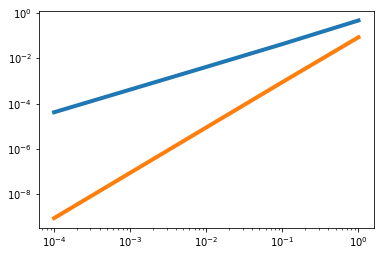

In [ ]:
dx = (1e-1)**np.array([0, 1, 2, 3, 4])
plt.loglog(dx, abs(forward_approx - true_solution), dx, abs(central_approx - true_solution), linewidth = 4)

In [ ]:
Slope1 = (np.log10(abs(forward_approx[-1] - true_solution))-np.log10(abs(forward_approx[0] - true_solution)))/(np.log10(dx[-1])-np.log10(dx[0]))
Slope2 = (np.log10(abs(central_approx[-1] - true_solution))-np.log10(abs(central_approx[0] - true_solution)))/(np.log10(dx[-1])-np.log10(dx[0]))
print('\n Forward Slope = ', Slope1, '\n Central Slope = ', Slope2)


 Forward Slope =  1.0125902962860651 
 Central Slope =  1.9945739524957418


Notice that the second slope is twice that of the first.  Since we are using log-log scale, the accuracy of central approximation will be the square of the first.  To convince you lets do the following:

In [ ]:
print('\n Central Slope with dx^2 = ', (np.log10(abs(central_approx[-1] - true_solution))-np.log10(abs(central_approx[1] - true_solution)))/(np.log10(dx[-1]**2)-np.log10(dx[1]**2)))


 Central Slope with dx^2 =  0.9999697746748636


Viola!  After we square the timestep we see that this is the same value as forward differences.  Actually this tells us for this particular case central differences is even more accurate than we theorized.  We can also see this visually:

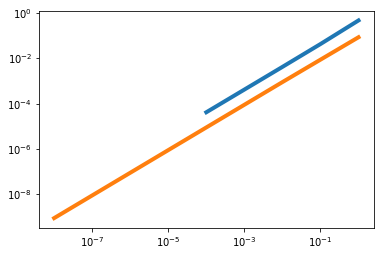

In [ ]:
plt.loglog(dx, abs(forward_approx - true_solution), dx**2, abs(central_approx - true_solution), linewidth = 4)

## Approximating over entire intervals
Now let's consider a very common situation: We have a list of $x$ values $x_0 < x_1 < \cdots < x_N$.  We want to approximate $f'(x_k)$ at *every* point in this list.  For example, suppose $f(x) = \sin(x)$ as before and we have the $x$ values 0, 0.1, 0.2, $\dotsc$, 5.9, 6.  

In [ ]:
x = np.arange(0, 6.1, 0.1)
n = x.size

We will collect all of these approximations in a vector named `deriv`, so that the first entry of `deriv` corresponds to the derivative at the first $x$ value, etc.  

In [ ]:
deriv = np.zeros(n)

We can use any of our difference schemes for this problem.  For no particular reason, let's use the central difference scheme for each point.  We have to choose some value for $\Delta x$ as well, so let's start with $\Delta x = 1$.  

In [ ]:
dx = 1
for k in range(n):
    deriv[k] = (np.sin(x[k] + dx) - np.sin(x[k] - dx)) / (2 * dx)

We can see how good our approximation is in a couple of ways.  To start, we could plot our approximation alongside the true solution $f'(x) = \cos(x)$.  

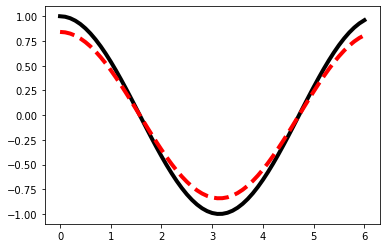

In [ ]:
plt.plot(x, np.cos(x), 'k', x, deriv, 'r--', linewidth = 4)

or we can plot the error (i.e., the difference between our approximation and the true solution).  

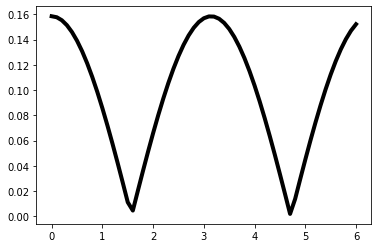

In [ ]:
err = abs(deriv - np.cos(x))
plt.plot(x, err, 'k', linewidth = 4)

Notice the scale on the $y$ axis here.  Our approximation is off by roughly $\pm 0.2$.  If we decrease $\Delta x$, we can make this more accurate.  For example, 

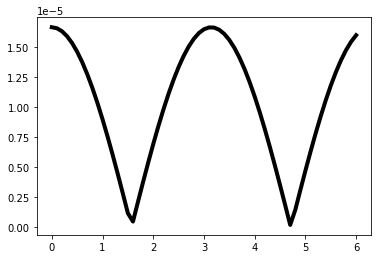

In [ ]:
dx = 0.01
deriv = np.zeros(n)
for k in range(n):
    deriv[k] = (np.sin(x[k] + dx) - np.sin(x[k] - dx)) / (2 * dx)
err = abs(deriv - np.cos(x))
plt.plot(x, err, 'k', linewidth = 4)

Again, note the scale on the $y$ axis.  We reduced $\Delta x$ by a factor of 100 and the error fell by a factor of $100^2 = 10,000$.  This once again confirms that the central scheme is second order.  

# Older notes: 
## Approximating Derivatives From Data
To see why we might care about higher order schemes, let's change our scenario slightly.  Instead of knowing $f(x)$ and a list of $x$ values, let's instead suppose that we only have a list of points: $(x_0, y_0)$, $(x_1, y_1)$, $\dotsc$, $(x_N, y_N)$.  We assume that these $y$ values come from some function $f(x)$, so that $f(x_k) = y_k$, but we don't know the formula for this function.  We will further assume that the $x$ values are evenly spaced and we will call the distance between two subsequent $x$ values $\Delta x$.  That is, $x_k = x_0 + k\Delta x$.  Everything we do below still works fine if the $x$ values are not evenly spaced, but it becomes much more tedious to write down the formulas.  

For example, suppose we are given the data

In [ ]:
x = np.arange(0, 6.1, 0.1)
y = np.sin(x)

Of course, you can tell from this code that the function is really $f(x) = \sin(x)$, but we will pretend that we don't have access to this function.  (Usually the $y$ values come from actual data, so you really don't know the function $f$.)  We want to do the same thing as before: Approximate $f'(x_k)$ at each of the given $x$ values and store our approximations in the array `deriv`.  

In [ ]:
n = x.size
deriv = np.zeros(n)

Unfortunately, our old code will not work.  The problem is that we used the function $f$ many times in that code.  Every time through the loop we used both `f(x[k] + dx)` and `f(x[k] - dx)`.  Since we don't know $f$, neither of these is possible.  However, both of these are $$ values of the function.  If we choose our $\Delta x$ correctly, the hope is that we can use some of the $y$ values we already know rather than plugging anything into the function $f$.  

In particular, since the $x$ values are each spaced $0.1$ apart, let's choose $\Delta x = 0.1$.  

In [ ]:
dx = 0.1

As an example, let's try to approximate $f'$ at the 21st $x$ value:

In [ ]:
print(x[20])

2.0


That is, we want to find $f'(2)$.  We don't actually have the function $f(x)$, but if we did we could write 

`deriv[20] = (f(x[20] + dx) - f(x[20] - dx)) / (2 * dx)`

Since $\Delta x = 0.1$, this translates to 

`deriv[20] = (f(x[20] + 0.1) - f(x[20] - 0.1)) / (2 * 0.1)`

or

`deriv[20] = (f(2.1) - f(1.9)) / (2 * 0.1)`

We don't know the function $f$, but 2.1 and 1.9 are actually two of the $x$ values from our original data set.  They are `x[21]` and `x[19]`.  This means that we already know $f(2.1)$ and $f(1.9)$ - they are just `y[21]` and `y[19]`.  This means that we can calculate the desired derivative with 

In [ ]:
deriv[20] = (deriv[21] - deriv[19]) / (2 * dx)

A little experimentation will show that this works for almost every one of our $x$ values.  (We will see why the "almost" is there in a moment.)  If you want to approximate the derivative of $f$ at `x[k]`, you can use the fact that `x[k] + dx = x[k + 1]` and that `x[k] - dx = x[k - 1]`, and so the corresponding $y$ values are `f(x[k] + dx) = y[k + 1]` and `f(x[k] - dx) = y[k - 1]`.  We can therefore try the code 

`for k in range(n):
    deriv[k] = (y[k + 1] - y[k - 1]) / (2 * dx)`
    
Unfortunately, if you try to run this code you will immediately encounter an error.  The problem arises when we try to compute $f'(x_0)$, which is `deriv[0]` in code, and when we try to compute $f'(x_N)$, which is `deriv[n-1]` in code.  Let's look at the first one.  When $k = 0$ (that is, when we are trying to find $f'$ at the first $x$ value) we need `y[1]` and `y[-1]`.  Unfortunately, the code `y[-1]` does not actually give us what we want.  It doesn't cause an error, but it gives the last $y$ value, which is actually $y_N$.  However, in order to use a central scheme at $x_0$ we would need to know $f(x_0 - \Delta x)$, and $x_0 - \Delta x = -0.1$, which is not one of our original data poitns.  This means that we don't know the corresponding $y$ value, so it is impossible to use this difference scheme.  The only solution (without calculating more $y$ values) is to use a different kind of scheme.  In particular, we can use a forward difference scheme.  This translates to 

$f'(x_0) \approx \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x}$.  

In code, this is `(f(x[0] + dx) - f(x[0])) / dx`, which is the same as `(f(x[1]) - f(x[0])) / dx`.  This means that we can write the forward difference scheme solely in terms of the original data.  

Similarly, when $k = n - 1$ (that is, when we are trying to find $f'$ at the last $x$ value) we need `y[n-2]` and `y[n]`.  Unfortunately, `y[n]` does not exist.  The problem is that this is one after the last $y$ value in our data, so it is not one of our original data points.  The only solution (without calculating more $y$ values) is to use a backward difference scheme.  This translates to 

$f'(x_N) \approx \frac{f(x_N) - f(x_N - \Delta x)}{\Delta x}$.  

In code, this is `(f(x[n-1]) - f(x[n-1] - dx)) / dx`, which is the same as `(f(x[n-1]) - f(x[n-2])) / dx`, which is just `(y[n-1] - y[n-2]) / dx`.  This means that we can also write the backward scheme solely in terms of the original data.  

We now have a full solution to our problem: We can use the central scheme (or any other scheme we want) for every point except the first and the last.  For the first point, we need to use a forward difference scheme and for the last point we need to use a backward difference scheme.  We can therefore write 

In [ ]:
deriv[0] = (y[1] - y[0]) / dx
for k in range(1, n - 1):
    deriv[k] = (y[k + 1] - y[k - 1]) / (2 * dx)
deriv[n - 1] = (y[n - 1] - y[n - 2]) / dx

We can check our solution by plotting it alongside the actual derivative

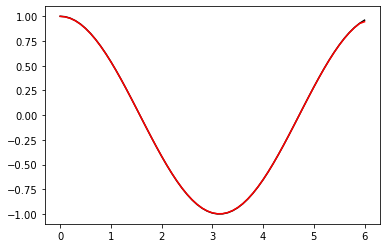

In [ ]:
plt.plot(x, np.cos(x), 'k', x, deriv, 'r')

or by plotting the error

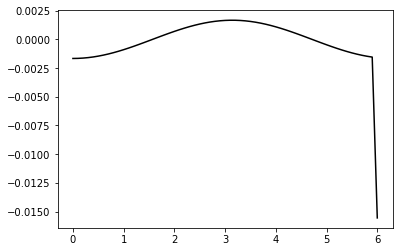

In [ ]:
plt.plot(x, deriv - np.cos(x), 'k')

The error for the first and last points is quite different from the error for the middle points.  This is because we used different schemes with different error terms.  How can we reduce this error?  The obvious approach would be to reduce $\Delta x$, but if you try just setting `dx = 0.01`,you will find that the approximation gets much worse.  The problem is that our original $x$ values were all 0.1 apart, so we cannot find appropriate $y$ values if we choose $\Delta x$ any smaller than 0.1.  The only way to make $\Delta x$ any smaller is to get more data points in the first place.  (Usually this requires paying someone to go and collect more data, which rapidly gets very expensive.)  For example, we could try 

In [ ]:
dx = 0.01
x = np.arange(0, 6.01, 0.01)
y = np.sin(x)

n = x.size
deriv = np.zeros(n)
deriv[0] = (y[1] - y[0]) / dx
for k in range(1, n - 1):
    deriv[k] = (y[k + 1] - y[k - 1]) / (2 * dx)
deriv[-1] = (y[-1] - y[-2]) / dx

This is almost the same code as before, but notice that there are ten times as many $x$ and $y$ values.  If we look at the error now, we get 

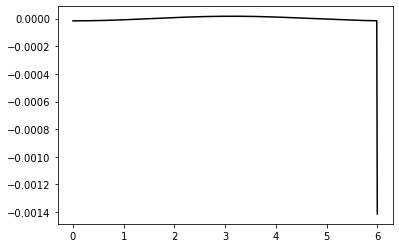

In [ ]:
plt.plot(x, deriv - np.cos(x), 'k')

The scale of the $y$ axis did get smaller.  In particular, it is about ten times smaller.  If we try the same thing with $\Delta x = 0.001$, we get 

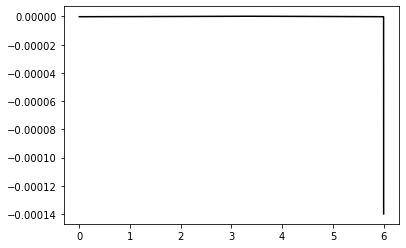

In [ ]:
dx = 0.001
x = np.arange(0, 6.001, 0.001)
y = np.sin(x)

n = x.size
deriv = np.zeros(n)
deriv[0] = (y[1] - y[0]) / dx
for k in range(1, n - 1):
    deriv[k] = (y[k + 1] - y[k - 1]) / (2 * dx)
deriv[-1] = (y[-1] - y[-2]) / dx

plt.plot(x, deriv - np.cos(x), 'k')

Once again, the error (the scale on the $y$ axis) went down by a factor of ten as well.  However, something strange is clearly going on.  The error for most of the points is *much* smaller than the error for the last point.  The issue is that the backward difference scheme is only first order, while the central difference scheme is second order.  Every time we reduce $\Delta x$ by a factor of ten, the error for most points drops by a factor of 100, while the error for the last point only drops by a factor of 10.  The difference becomes quite dramatic after $\Delta x$ gets small enough.  All of the errors go to zero, but the error for the last point goes to zero much more slowly than the central scheme.  

In many applications, the worst case error is the one we care about.  This means that if one of the schemes we use is only first order, then our overall error will also be first order, even if most of our approximations are much more accurate.  

## Higher Order Forward/Backward Schemes
The solution to this problem is to use a second order scheme for every point.  This means that we need a second order forward difference scheme for $f'(x)$ and a second order backward difference scheme for $f'(x)$.  Fortunately for us, such schemes exist.  We can use 

$f'(x) \approx \frac{-3f(x) + 4f(x + \Delta x) - f(x + 2\Delta x)}{2\Delta x}$

and 

$f'(x) \approx \frac{3f(x) - 4f(x - \Delta x) + f(x - 2\Delta x)}{2\Delta x}$.  

The former is a forward difference scheme and the latter is a backward difference scheme.  We can check the order of both of these schemes with the same approach we used last time: Taylor expand every term around $x$ and simplify.  The following Taylor expansions will be useful (and are easy to derive from the basic formula for $f(x + \Delta x)$): 

$f(x + \Delta x) = f(x) + \Delta x f'(x) + \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)$, 

$f(x - \Delta x) = f(x) - \Delta x f'(x) + \frac{(\Delta x)^2}{2}f''(x) - \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)$, 

$f(x + 2\Delta x) = f(x) +2 \Delta x f'(x) + \frac{(2\Delta x)^2}{2}f''(x) + \frac{(2\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)$, 

$f(x - \Delta x) = f(x) - 2\Delta x f'(x) + \frac{(2\Delta x)^2}{2}f''(x) - \frac{(2\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)$.

As an example, let's verify that the forward scheme is second order.  We have 

$f'(x) \approx \frac{-3f(x) + 4f(x + \Delta x) - f(x + 2\Delta x)}{2\Delta x}$

$= \frac{1}{2\Delta x}\left[-3f(x) + 4\left(f(x) + \Delta xf'(x) + \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)\right) - \left(f(x) + 2\Delta xf'(x) + 2(\Delta x)^2f''(x) + \frac{8(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)\right)\right]$

$= \frac{1}{2\Delta x}\left[2\Delta x f'(x) - \frac{2(\Delta x)^3}{3}f'''(x) + \mathcal{O}(\Delta x^4)\right]$

$= f'(x) - \frac{(\Delta x)^2}{3}f'''(x) + \mathcal{O}(\Delta x^3)$.  

Since the first term is $f'(x)$, this is a consistent scheme.  Since the second term has a $\Delta x^2$, this is a second order scheme.  The proof for the backward scheme is very similar.  

We can use these schemes to improve our code from the previous section.  We wll still use a central scheme for most of the points (since it is already second order) and we will use these new schemes for the first and last points.  

In [ ]:
dx = 0.001
x = np.arange(0, 6.001, 0.001)
y = np.sin(x)

n = x.size
deriv = np.zeros(n)
deriv[0] = (-3 * y[0] + 4 * y[1] - y[2]) / (2 * dx)
for k in range(1, n - 1):
    deriv[k] = (y[k + 1] - y[k - 1]) / (2 * dx)
deriv[-1] = (3 * y[-1] - 4 * y[-2] + y[-3]) / (2 * dx)

If we plot the error now

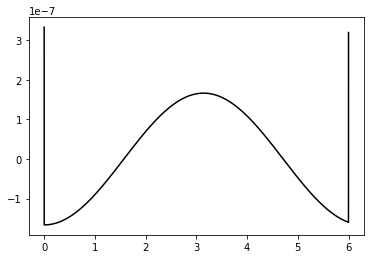

In [ ]:
plt.plot(x, deriv - np.cos(x), 'k')

we can see that all of the errors are on roughly the same scale, and that the maximum error is now much lower than before.  